In [1]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Martin_Gales']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Trizze']
data2 = data[data['user'] == 'MatthewTheTaxCollector']




# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats.head(10)

,total_messages,watch_length,stream_length
stream,,,
49,96,13378.0,22548.0
67,88,10099.0,23469.0
54,40,2080.0,21630.0
74,38,8986.0,9082.0
48,14,5482.0,25912.0
55,10,195.0,16004.0
57,9,384.0,17445.0
52,2,2.0,29431.0
42,1,0.0,21262.0


In [2]:
stream_stats.describe()

,total_messages,watch_length,stream_length
count,10.000000,10.000000,10.000000
mean,29.900000,4060.600000,20526.000000
std,35.663395,5070.485035,5656.096495
min,1.000000,0.000000,9082.000000
25%,3.750000,50.250000,17703.000000
50%,12.000000,1232.000000,21446.000000
75%,39.500000,8110.000000,23238.750000
max,96.000000,13378.000000,29431.000000


In [3]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
stream,,,,,
49,96,13378.0,22548.0,3.716111,6.263333
67,88,10099.0,23469.0,2.805278,6.519167
54,40,2080.0,21630.0,0.577778,6.008333
74,38,8986.0,9082.0,2.496111,2.522778
48,14,5482.0,25912.0,1.522778,7.197778


In [4]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100

stream_stats.head(5)



,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
stream,,,,,,
49,96,13378.0,22548.0,3.716111,6.263333,59.331205
67,88,10099.0,23469.0,2.805278,6.519167,43.031233
54,40,2080.0,21630.0,0.577778,6.008333,9.616274
74,38,8986.0,9082.0,2.496111,2.522778,98.942964
48,14,5482.0,25912.0,1.522778,7.197778,21.156221


In [5]:
stream_stats['persenteg'].describe()

count    10.000000
mean     23.550434
std      33.601832
min       0.000000
25%       0.309708
50%       5.908739
75%      37.562480
max      98.942964
Name: persenteg, dtype: float64

In [6]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)


,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
stream,,,,,,
42,1,0.0,21262.0,0.000000,5.906111,0.000000
62,1,0.0,18477.0,0.000000,5.132500,0.000000
52,2,2.0,29431.0,0.000556,8.175278,0.006796
55,10,195.0,16004.0,0.054167,4.445556,1.218445
57,9,384.0,17445.0,0.106667,4.845833,2.201204
54,40,2080.0,21630.0,0.577778,6.008333,9.616274
48,14,5482.0,25912.0,1.522778,7.197778,21.156221
67,88,10099.0,23469.0,2.805278,6.519167,43.031233
49,96,13378.0,22548.0,3.716111,6.263333,59.331205


In [7]:
stream_stats['watch_length_in_hour'].sum() /24

0.46997685185185184

In [8]:
stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,42,1,0.0,21262.0,0.000000,5.906111,0.000000
6,48,14,5482.0,25912.0,1.522778,7.197778,21.156221
8,49,96,13378.0,22548.0,3.716111,6.263333,59.331205
2,52,2,2.0,29431.0,0.000556,8.175278,0.006796
5,54,40,2080.0,21630.0,0.577778,6.008333,9.616274
3,55,10,195.0,16004.0,0.054167,4.445556,1.218445
4,57,9,384.0,17445.0,0.106667,4.845833,2.201204
1,62,1,0.0,18477.0,0.000000,5.132500,0.000000
7,67,88,10099.0,23469.0,2.805278,6.519167,43.031233
9,74,38,8986.0,9082.0,2.496111,2.522778,98.942964


In [9]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,42,1,0.0,21262.0,0.000000,5.906111,0.000000
6,48,14,5482.0,25912.0,1.522778,7.197778,21.156221
8,49,96,13378.0,22548.0,3.716111,6.263333,59.331205
2,52,2,2.0,29431.0,0.000556,8.175278,0.006796
5,54,40,2080.0,21630.0,0.577778,6.008333,9.616274
3,55,10,195.0,16004.0,0.054167,4.445556,1.218445
4,57,9,384.0,17445.0,0.106667,4.845833,2.201204
1,62,1,0.0,18477.0,0.000000,5.132500,0.000000
7,67,88,10099.0,23469.0,2.805278,6.519167,43.031233
9,74,38,8986.0,9082.0,2.496111,2.522778,98.942964


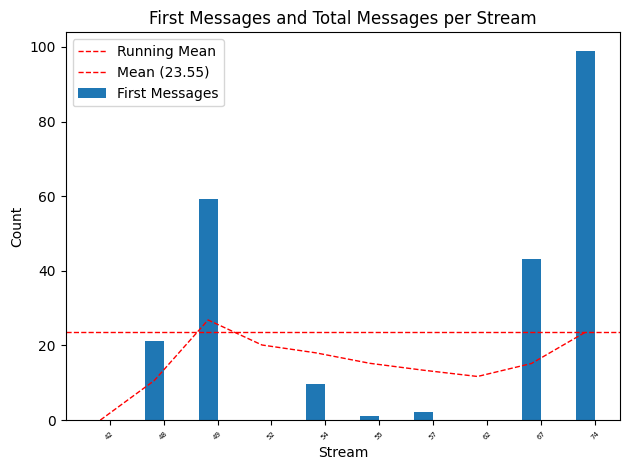

In [10]:
import matplotlib.pyplot as plt


# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('First Messages and Total Messages per Stream', fontsize=12)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(stream_stats['stream'], fontsize=5)  # Adjust x-tick labels font size
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()
